In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as skmet
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.optimize import curve_fit

In [2]:
#Reading the data frame
df_capita_country = "C:/Users/user/Desktop/ADS1/CO2perGDP (1).csv"
df_capita = pd.read_csv(df_capita_country, skiprows = 4)

In [3]:
df_capita.columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] + list(df_capita.columns[4:])

In [4]:
df_capita.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.368970e+09,2.610039e+09,3.126019e+09
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.129152e+10,2.180944e+10,2.370806e+10,2.821128e+10,2.611994e+10,2.968348e+10,...,9.720020e+11,9.826770e+11,1.003400e+12,9.231440e+11,8.898590e+11,1.030480e+12,1.016700e+12,1.009050e+12,9.341790e+11,1.089450e+12
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.020357e+10,2.056449e+10,2.055058e+10,1.999816e+10,1.801956e+10,1.889635e+10,1.841885e+10,1.890449e+10,2.014344e+10,1.478686e+10
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,...,7.360400e+11,8.322170e+11,8.924980e+11,7.669580e+11,6.905450e+11,6.837480e+11,7.663600e+11,7.947190e+11,7.848000e+11,8.401870e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.249980e+11,1.334020e+11,1.372440e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.361907e+10,6.740429e+10


In [5]:
df_capita.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,1.340000e+02,1.360000e+02,1.380000e+02,1.380000e+02,1.380000e+02,1.490000e+02,1.520000e+02,1.550000e+02,1.600000e+02,1.600000e+02,...,2.580000e+02,2.590000e+02,2.600000e+02,2.580000e+02,2.570000e+02,2.570000e+02,2.570000e+02,2.550000e+02,2.520000e+02,2.450000e+02
mean,7.103307e+10,7.186605e+10,7.549844e+10,8.144482e+10,8.941396e+10,9.084577e+10,1.010890e+11,1.048751e+11,1.100031e+11,1.216457e+11,...,2.401034e+12,2.477219e+12,2.538873e+12,2.400201e+12,2.444669e+12,2.619921e+12,2.783540e+12,2.845284e+12,2.790295e+12,3.276616e+12
std,2.132399e+11,2.208574e+11,2.354227e+11,2.532710e+11,2.769942e+11,2.909743e+11,3.185995e+11,3.369850e+11,3.589006e+11,3.950249e+11,...,8.162805e+12,8.385430e+12,8.597521e+12,8.158733e+12,8.314436e+12,8.847929e+12,9.417931e+12,9.586893e+12,9.387494e+12,1.079655e+13
min,1.201201e+07,1.159201e+07,9.122751e+06,1.084010e+07,1.271247e+07,1.359393e+07,1.446908e+07,1.583518e+07,1.460000e+07,1.585000e+07,...,3.934562e+07,3.861749e+07,3.875969e+07,3.681166e+07,4.162950e+07,4.521766e+07,4.781829e+07,5.422315e+07,5.505471e+07,6.310096e+07
25%,5.151683e+08,5.215510e+08,5.354690e+08,5.336845e+08,5.526379e+08,5.929812e+08,6.427026e+08,6.264909e+08,6.454036e+08,6.912229e+08,...,8.323043e+09,8.488220e+09,9.029027e+09,8.589120e+09,8.595956e+09,9.252834e+09,9.880676e+09,1.088080e+10,1.016305e+10,1.226939e+10
50%,2.976974e+09,2.966849e+09,3.050700e+09,3.570681e+09,3.432183e+09,3.120871e+09,3.549759e+09,3.384063e+09,4.064739e+09,4.759106e+09,...,4.690472e+10,5.094967e+10,5.339963e+10,4.966795e+10,4.984049e+10,5.472660e+10,5.700369e+10,6.113687e+10,5.715932e+10,6.740429e+10
75%,2.976519e+10,2.822553e+10,2.788859e+10,3.229580e+10,2.974366e+10,2.834471e+10,2.947510e+10,3.076382e+10,3.420277e+10,3.741948e+10,...,5.508585e+11,5.373935e+11,5.478620e+11,5.020848e+11,5.156550e+11,5.492680e+11,5.554550e+11,5.700680e+11,6.254288e+11,8.190350e+11
max,1.392270e+12,1.448620e+12,1.550540e+12,1.671610e+12,1.830290e+12,1.993900e+12,2.163890e+12,2.302530e+12,2.485210e+12,2.741170e+12,...,7.550040e+13,7.760620e+13,7.973260e+13,7.518640e+13,7.646940e+13,8.140950e+13,8.646700e+13,8.765430e+13,8.511630e+13,9.652740e+13


In [6]:
# List of countries needed
countries_needed = ['Senegal', 'Sri Lanka', 'Kenya', 'France', 'Algeria', 'Suriname', 
                    'Ghana', 'United States', 'Malawi', 'Papua New Guinea', 'Nepal', 
                    'Colombia', 'Seychelles', 'Lesotho', 'Philippines', 'Puerto Rico', 
                    'Mexico', 'Singapore', 'Japan', 'Cote dIvoire', 'Fiji', 'Rwanda', 
                    'Hong Kong SAR', 'China', 'Australia', 'Congo, Dem. Rep', 
                    'St. Vincent and the Grenadines', 'Sweden', 'Portugal', 'United Kingdom']

# Selecting the countries needed
df_capita = df_capita[df_capita['Country Name'].isin(countries_needed)]
print(df_capita)

                       Country Name Country Code     Indicator Name  \
13                        Australia          AUS  GDP (current US$)   
40                            China          CHN  GDP (current US$)   
45                         Colombia          COL  GDP (current US$)   
60                          Algeria          DZA  GDP (current US$)   
76                             Fiji          FJI  GDP (current US$)   
77                           France          FRA  GDP (current US$)   
81                   United Kingdom          GBR  GDP (current US$)   
83                            Ghana          GHA  GDP (current US$)   
119                           Japan          JPN  GDP (current US$)   
121                           Kenya          KEN  GDP (current US$)   
138                       Sri Lanka          LKA  GDP (current US$)   
141                         Lesotho          LSO  GDP (current US$)   
154                          Mexico          MEX  GDP (current US$)   
168   

In [7]:
df_capita = df_capita.drop(['Indicator Name', 'Country Code', 'Indicator Code'], axis=1)
print(df_capita)

                       Country Name          1960          1961          1962  \
13                        Australia  1.860567e+10  1.968194e+10  1.992160e+10   
40                            China  5.971647e+10  5.005687e+10  4.720936e+10   
45                         Colombia  4.031153e+09  4.540448e+09  4.955544e+09   
60                          Algeria  2.723593e+09  2.434727e+09  2.001428e+09   
76                             Fiji  1.123284e+08  1.169878e+08  1.229064e+08   
77                           France  6.222548e+10  6.746164e+10  7.560753e+10   
81                   United Kingdom  7.323397e+10  7.774197e+10  8.124756e+10   
83                            Ghana  1.217087e+09  1.302521e+09  1.382353e+09   
119                           Japan  4.430734e+10  5.350862e+10  6.072302e+10   
121                           Kenya  7.912655e+08  7.929595e+08  8.681114e+08   
138                       Sri Lanka  1.409874e+09  1.444328e+09  1.434156e+09   
141                         

In [8]:
# reseting the index
df_capita.reset_index(drop=True, inplace=True)
print(df_capita)

                      Country Name          1960          1961          1962  \
0                        Australia  1.860567e+10  1.968194e+10  1.992160e+10   
1                            China  5.971647e+10  5.005687e+10  4.720936e+10   
2                         Colombia  4.031153e+09  4.540448e+09  4.955544e+09   
3                          Algeria  2.723593e+09  2.434727e+09  2.001428e+09   
4                             Fiji  1.123284e+08  1.169878e+08  1.229064e+08   
5                           France  6.222548e+10  6.746164e+10  7.560753e+10   
6                   United Kingdom  7.323397e+10  7.774197e+10  8.124756e+10   
7                            Ghana  1.217087e+09  1.302521e+09  1.382353e+09   
8                            Japan  4.430734e+10  5.350862e+10  6.072302e+10   
9                            Kenya  7.912655e+08  7.929595e+08  8.681114e+08   
10                       Sri Lanka  1.409874e+09  1.444328e+09  1.434156e+09   
11                         Lesotho  3.45

In [9]:
# Extracting years from our urban out dataset
df_capita_s=df_capita[['Country Name','1990', '2000','2010', '2019']]
df_capita_s.describe()

,1990,2000,2010,2019
count,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01
mean,4.816170e+11,7.933747e+11,1.339763e+12,1.908650e+12
std,1.275480e+12,2.145386e+12,3.188921e+12,4.839364e+12
min,2.403667e+08,4.279460e+08,7.204479e+08,9.101497e+08
25%,2.884958e+09,2.794460e+09,1.060521e+10,1.721209e+10
50%,3.060392e+10,5.479039e+10,9.838130e+10,1.051260e+11
75%,2.615500e+11,3.393430e+11,7.768065e+11,9.014450e+11
max,5.963140e+12,1.025090e+13,1.504900e+13,2.138100e+13


In [10]:
# Checking for missing values
df_capita_s.isna().sum()

Country Name    0
1990            0
2000            0
2010            0
2019            0
dtype: int64

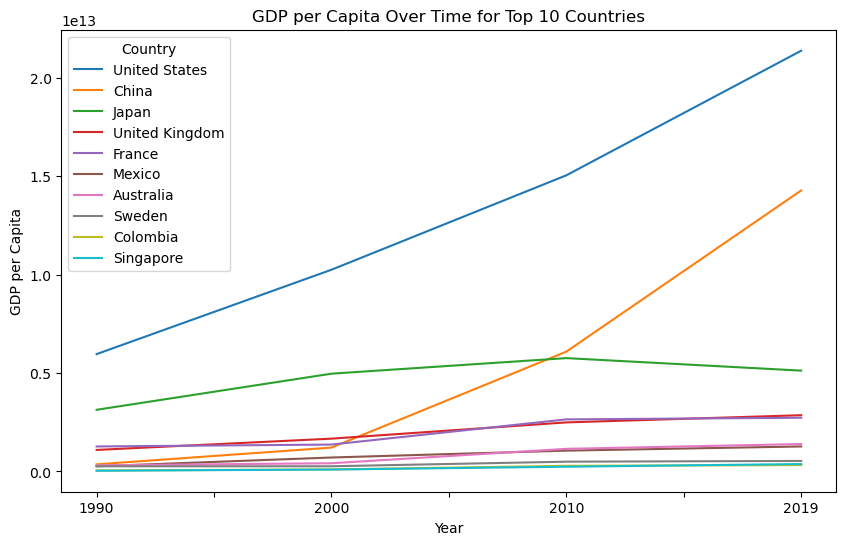

In [11]:
# Transposing the data
df_capita_t = df_capita_s.T
df_capita_t.columns = df_capita_t.iloc[0]
df_capita_t = df_capita_t.iloc[1:]
df_capita_t.describe()
df_capita_t = df_capita_t.apply(pd.to_numeric, errors='coerce')

# Sorting by mean and selecting top 10 countries
top_10_countries = df_capita_t.mean().sort_values(ascending=False).head(10).index
df_top_10 = df_capita_t[top_10_countries]

# Plotting for top 10 countries
df_top_10.plot(figsize=(10, 6))
plt.title('GDP per Capita Over Time for Top 10 Countries')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.legend(title='Country')

In [12]:
# In this data, i will be working with 2019 data
# Extracting 30 years of data at an interval of 10 years from out dataset
df_capita_year=df_capita_s[['1990', '2000','2010', '2019']]
df_capita_year.describe()

,1990,2000,2010,2019
count,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01
mean,4.816170e+11,7.933747e+11,1.339763e+12,1.908650e+12
std,1.275480e+12,2.145386e+12,3.188921e+12,4.839364e+12
min,2.403667e+08,4.279460e+08,7.204479e+08,9.101497e+08
25%,2.884958e+09,2.794460e+09,1.060521e+10,1.721209e+10
50%,3.060392e+10,5.479039e+10,9.838130e+10,1.051260e+11
75%,2.615500e+11,3.393430e+11,7.768065e+11,9.014450e+11
max,5.963140e+12,1.025090e+13,1.504900e+13,2.138100e+13


In [13]:
# Checking for missing values
df_capita_year.isna().sum()

1990    0
2000    0
2010    0
2019    0
dtype: int64

In [14]:
# Create a copy of the DataFrame
df_capita_year_copy = df_capita_year.copy().dropna()

In [15]:
# Checking for correlation between our years choosen
corr = df_capita_year_copy.corr()
print(corr)

          1990      2000      2010      2019
1990  1.000000  0.994826  0.940562  0.819120
2000  0.994826  1.000000  0.960139  0.856835
2010  0.940562  0.960139  1.000000  0.964662
2019  0.819120  0.856835  0.964662  1.000000


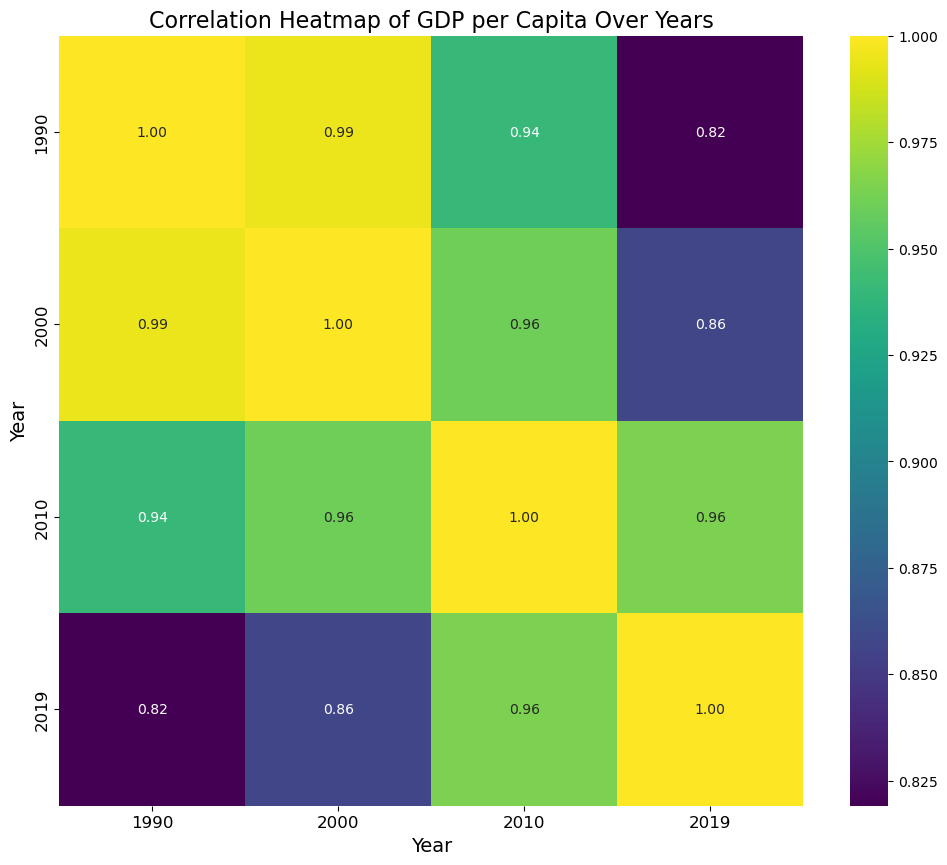

In [16]:
# Plotting the heatmap
plt.figure(figsize=(12, 10))  # Adjusted figure size for clarity
sns.heatmap(corr, cmap='viridis', annot=True, fmt=".2f", annot_kws={'size': 10})
plt.title("Correlation Heatmap of GDP per Capita Over Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Year", fontsize=14)
plt.xticks(fontsize=12)  # Adjust x-axis labels' font size
plt.yticks(fontsize=12)  # Adjust y-axis labels' font size
plt.show()

In [17]:
#Transpossing
df_capita_trans = df_capita.T


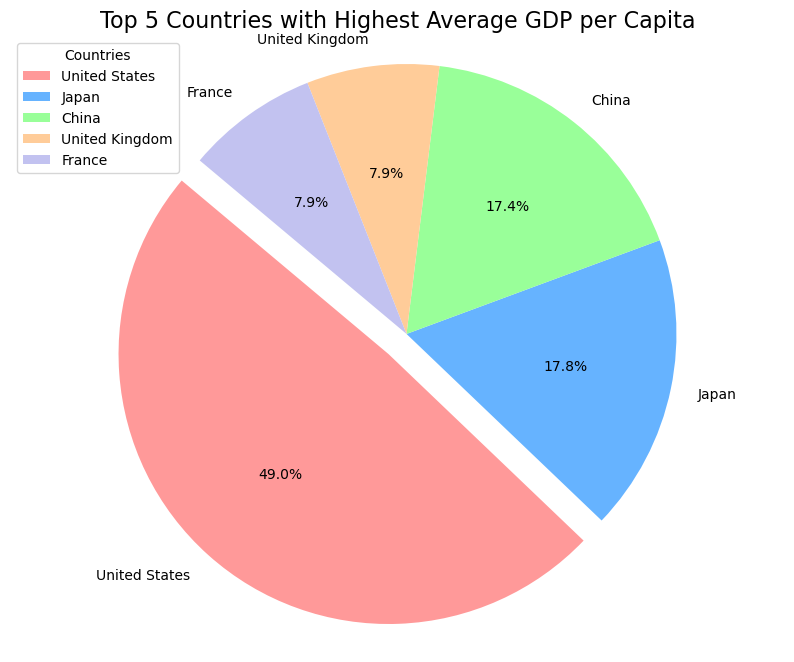

In [18]:
# Assuming df_capita_trans is your transposed DataFrame
df_capita_trans.columns = df_capita_trans.iloc[0]  # Setting the first row as the header
df_capita_years = df_capita_trans[1:].copy()  # Dropping the first row if it's now redundant

# Convert all data to numeric, forcing non-convertible values to NaN
df_capita_trans_numeric = df_capita_years.apply(pd.to_numeric, errors='coerce')

# Now, calculate the mean across each country (column), skipping NaN values
country_means = df_capita_trans_numeric.mean(skipna=True)

# Get the top 5 countries by their mean GDP per capita
top_5_countries = country_means.nlargest(5)

# Customizing the color palette for the pie chart
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0']

# Using the explode parameter to highlight the top country
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e., 'Top Country')

# Plotting the pie chart for the top 5 countries by GDP per capita
plt.figure(figsize=(10, 8))
plt.pie(top_5_countries.values, labels=top_5_countries.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)

plt.title('Top 5 Countries with Highest Average GDP per Capita', fontsize=16)
plt.legend(top_5_countries.index, title="Countries", loc="best")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [19]:
# Selecting only the years the data frame
df_capita_years=df_capita_trans.iloc[1:]
df_capita_years


df_capita_years=df_capita_years.apply(pd.to_numeric)
df_capita_years

Country Name,Australia,China,Colombia,Algeria,Fiji,France,United Kingdom,Ghana,Japan,Kenya,...,Puerto Rico,Portugal,Rwanda,Senegal,Singapore,Suriname,Sweden,Seychelles,United States,St. Vincent and the Grenadines
1960,1.860567e+10,5.971647e+10,4.031153e+09,2.723593e+09,1.123284e+08,6.222548e+10,7.323397e+10,1.217087e+09,4.430734e+10,7.912655e+08,...,1.691900e+09,3.193200e+09,1.190000e+08,1.003692e+09,7.047563e+08,9.965000e+07,1.582259e+10,1.201201e+07,5.433000e+11,1.306656e+07
1961,1.968194e+10,5.005687e+10,4.540448e+09,2.434727e+09,1.169878e+08,6.746164e+10,7.774197e+10,1.302521e+09,5.350862e+10,7.929595e+08,...,1.865100e+09,3.417517e+09,1.220000e+08,1.058975e+09,7.646348e+08,1.077000e+08,1.721269e+10,1.159201e+07,5.633000e+11,1.399988e+07
1962,1.992160e+10,4.720936e+10,4.955544e+09,2.001428e+09,1.229064e+08,7.560753e+10,8.124756e+10,1.382353e+09,6.072302e+10,8.681114e+08,...,2.094400e+09,3.668222e+09,1.250000e+08,1.085476e+09,8.262446e+08,1.161500e+08,1.866725e+10,1.264203e+07,6.051000e+11,1.452488e+07
1963,2.153881e+10,5.070680e+10,4.836167e+09,2.702960e+09,1.294547e+08,8.475920e+10,8.656196e+10,1.540616e+09,6.949813e+10,9.265893e+08,...,2.333600e+09,3.905734e+09,1.280000e+08,1.122140e+09,9.176140e+08,1.259500e+08,2.020487e+10,1.392303e+07,6.386000e+11,1.370822e+07
1964,2.379998e+10,5.970834e+10,5.973367e+09,2.909293e+09,1.400327e+08,9.400785e+10,9.440756e+10,1.731092e+09,8.174901e+10,9.987593e+08,...,2.570500e+09,4.235608e+09,1.300000e+08,1.188931e+09,8.941592e+08,1.344000e+08,2.253242e+10,1.539303e+07,6.858000e+11,1.475821e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,1.326520e+12,1.231040e+13,3.118840e+11,1.700970e+11,5.353404e+09,2.595150e+12,2.683400e+12,6.040638e+10,4.930840e+12,8.203580e+10,...,1.034460e+11,2.213580e+11,9.252834e+09,2.099656e+10,3.431930e+11,3.591661e+09,5.410190e+11,1.573433e+09,1.947730e+13,8.476202e+08
2018,1.428290e+12,1.389480e+13,3.341980e+11,1.749110e+11,5.581372e+09,2.790960e+12,2.878150e+12,6.729928e+10,5.037840e+12,9.220296e+10,...,1.009580e+11,2.423130e+11,9.642441e+09,2.311690e+10,3.769980e+11,3.996205e+09,5.554550e+11,1.636312e+09,2.053310e+13,8.843282e+08
2019,1.392230e+12,1.427990e+13,3.231100e+11,1.717670e+11,5.481675e+09,2.728870e+12,2.857060e+12,6.833754e+10,5.123320e+12,1.003800e+11,...,1.051260e+11,2.399870e+11,1.035633e+10,2.339881e+10,3.754730e+11,4.016041e+09,5.338800e+11,1.684373e+09,2.138100e+13,9.101497e+08
2020,1.326900e+12,1.468770e+13,2.703000e+11,1.450090e+11,4.477040e+09,2.639010e+12,2.704610e+12,7.004320e+10,5.040110e+12,1.006670e+11,...,1.030200e+11,2.290320e+11,1.018435e+10,2.449316e+10,3.452960e+11,2.911807e+09,5.470540e+11,1.261199e+09,2.106050e+13,8.721346e+08


In [20]:
# resetting the index
df_capita_years.reset_index(inplace=True)
df_capita_years


Country Name,index,Australia,China,Colombia,Algeria,Fiji,France,United Kingdom,Ghana,Japan,...,Puerto Rico,Portugal,Rwanda,Senegal,Singapore,Suriname,Sweden,Seychelles,United States,St. Vincent and the Grenadines
0,1960,1.860567e+10,5.971647e+10,4.031153e+09,2.723593e+09,1.123284e+08,6.222548e+10,7.323397e+10,1.217087e+09,4.430734e+10,...,1.691900e+09,3.193200e+09,1.190000e+08,1.003692e+09,7.047563e+08,9.965000e+07,1.582259e+10,1.201201e+07,5.433000e+11,1.306656e+07
1,1961,1.968194e+10,5.005687e+10,4.540448e+09,2.434727e+09,1.169878e+08,6.746164e+10,7.774197e+10,1.302521e+09,5.350862e+10,...,1.865100e+09,3.417517e+09,1.220000e+08,1.058975e+09,7.646348e+08,1.077000e+08,1.721269e+10,1.159201e+07,5.633000e+11,1.399988e+07
2,1962,1.992160e+10,4.720936e+10,4.955544e+09,2.001428e+09,1.229064e+08,7.560753e+10,8.124756e+10,1.382353e+09,6.072302e+10,...,2.094400e+09,3.668222e+09,1.250000e+08,1.085476e+09,8.262446e+08,1.161500e+08,1.866725e+10,1.264203e+07,6.051000e+11,1.452488e+07
3,1963,2.153881e+10,5.070680e+10,4.836167e+09,2.702960e+09,1.294547e+08,8.475920e+10,8.656196e+10,1.540616e+09,6.949813e+10,...,2.333600e+09,3.905734e+09,1.280000e+08,1.122140e+09,9.176140e+08,1.259500e+08,2.020487e+10,1.392303e+07,6.386000e+11,1.370822e+07
4,1964,2.379998e+10,5.970834e+10,5.973367e+09,2.909293e+09,1.400327e+08,9.400785e+10,9.440756e+10,1.731092e+09,8.174901e+10,...,2.570500e+09,4.235608e+09,1.300000e+08,1.188931e+09,8.941592e+08,1.344000e+08,2.253242e+10,1.539303e+07,6.858000e+11,1.475821e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2017,1.326520e+12,1.231040e+13,3.118840e+11,1.700970e+11,5.353404e+09,2.595150e+12,2.683400e+12,6.040638e+10,4.930840e+12,...,1.034460e+11,2.213580e+11,9.252834e+09,2.099656e+10,3.431930e+11,3.591661e+09,5.410190e+11,1.573433e+09,1.947730e+13,8.476202e+08
58,2018,1.428290e+12,1.389480e+13,3.341980e+11,1.749110e+11,5.581372e+09,2.790960e+12,2.878150e+12,6.729928e+10,5.037840e+12,...,1.009580e+11,2.423130e+11,9.642441e+09,2.311690e+10,3.769980e+11,3.996205e+09,5.554550e+11,1.636312e+09,2.053310e+13,8.843282e+08
59,2019,1.392230e+12,1.427990e+13,3.231100e+11,1.717670e+11,5.481675e+09,2.728870e+12,2.857060e+12,6.833754e+10,5.123320e+12,...,1.051260e+11,2.399870e+11,1.035633e+10,2.339881e+10,3.754730e+11,4.016041e+09,5.338800e+11,1.684373e+09,2.138100e+13,9.101497e+08
60,2020,1.326900e+12,1.468770e+13,2.703000e+11,1.450090e+11,4.477040e+09,2.639010e+12,2.704610e+12,7.004320e+10,5.040110e+12,...,1.030200e+11,2.290320e+11,1.018435e+10,2.449316e+10,3.452960e+11,2.911807e+09,5.470540e+11,1.261199e+09,2.106050e+13,8.721346e+08


In [21]:
#renaming the country name to years
df_capita_years.rename(columns={'index': 'Year'}, inplace=True)
df_capita_years

Country Name,Year,Australia,China,Colombia,Algeria,Fiji,France,United Kingdom,Ghana,Japan,...,Puerto Rico,Portugal,Rwanda,Senegal,Singapore,Suriname,Sweden,Seychelles,United States,St. Vincent and the Grenadines
0,1960,1.860567e+10,5.971647e+10,4.031153e+09,2.723593e+09,1.123284e+08,6.222548e+10,7.323397e+10,1.217087e+09,4.430734e+10,...,1.691900e+09,3.193200e+09,1.190000e+08,1.003692e+09,7.047563e+08,9.965000e+07,1.582259e+10,1.201201e+07,5.433000e+11,1.306656e+07
1,1961,1.968194e+10,5.005687e+10,4.540448e+09,2.434727e+09,1.169878e+08,6.746164e+10,7.774197e+10,1.302521e+09,5.350862e+10,...,1.865100e+09,3.417517e+09,1.220000e+08,1.058975e+09,7.646348e+08,1.077000e+08,1.721269e+10,1.159201e+07,5.633000e+11,1.399988e+07
2,1962,1.992160e+10,4.720936e+10,4.955544e+09,2.001428e+09,1.229064e+08,7.560753e+10,8.124756e+10,1.382353e+09,6.072302e+10,...,2.094400e+09,3.668222e+09,1.250000e+08,1.085476e+09,8.262446e+08,1.161500e+08,1.866725e+10,1.264203e+07,6.051000e+11,1.452488e+07
3,1963,2.153881e+10,5.070680e+10,4.836167e+09,2.702960e+09,1.294547e+08,8.475920e+10,8.656196e+10,1.540616e+09,6.949813e+10,...,2.333600e+09,3.905734e+09,1.280000e+08,1.122140e+09,9.176140e+08,1.259500e+08,2.020487e+10,1.392303e+07,6.386000e+11,1.370822e+07
4,1964,2.379998e+10,5.970834e+10,5.973367e+09,2.909293e+09,1.400327e+08,9.400785e+10,9.440756e+10,1.731092e+09,8.174901e+10,...,2.570500e+09,4.235608e+09,1.300000e+08,1.188931e+09,8.941592e+08,1.344000e+08,2.253242e+10,1.539303e+07,6.858000e+11,1.475821e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2017,1.326520e+12,1.231040e+13,3.118840e+11,1.700970e+11,5.353404e+09,2.595150e+12,2.683400e+12,6.040638e+10,4.930840e+12,...,1.034460e+11,2.213580e+11,9.252834e+09,2.099656e+10,3.431930e+11,3.591661e+09,5.410190e+11,1.573433e+09,1.947730e+13,8.476202e+08
58,2018,1.428290e+12,1.389480e+13,3.341980e+11,1.749110e+11,5.581372e+09,2.790960e+12,2.878150e+12,6.729928e+10,5.037840e+12,...,1.009580e+11,2.423130e+11,9.642441e+09,2.311690e+10,3.769980e+11,3.996205e+09,5.554550e+11,1.636312e+09,2.053310e+13,8.843282e+08
59,2019,1.392230e+12,1.427990e+13,3.231100e+11,1.717670e+11,5.481675e+09,2.728870e+12,2.857060e+12,6.833754e+10,5.123320e+12,...,1.051260e+11,2.399870e+11,1.035633e+10,2.339881e+10,3.754730e+11,4.016041e+09,5.338800e+11,1.684373e+09,2.138100e+13,9.101497e+08
60,2020,1.326900e+12,1.468770e+13,2.703000e+11,1.450090e+11,4.477040e+09,2.639010e+12,2.704610e+12,7.004320e+10,5.040110e+12,...,1.030200e+11,2.290320e+11,1.018435e+10,2.449316e+10,3.452960e+11,2.911807e+09,5.470540e+11,1.261199e+09,2.106050e+13,8.721346e+08


In [22]:
#checking the values of Fiji and years
df_capita_years['Fiji'].values
print(df_capita_years.head())
df_capita_years['Year'].values

Country Name  Year     Australia         China      Colombia       Algeria  \
0             1960  1.860567e+10  5.971647e+10  4.031153e+09  2.723593e+09   
1             1961  1.968194e+10  5.005687e+10  4.540448e+09  2.434727e+09   
2             1962  1.992160e+10  4.720936e+10  4.955544e+09  2.001428e+09   
3             1963  2.153881e+10  5.070680e+10  4.836167e+09  2.702960e+09   
4             1964  2.379998e+10  5.970834e+10  5.973367e+09  2.909293e+09   

Country Name         Fiji        France  United Kingdom         Ghana  \
0             112328422.1  6.222548e+10    7.323397e+10  1.217087e+09   
1             116987784.9  6.746164e+10    7.774197e+10  1.302521e+09   
2             122906435.0  7.560753e+10    8.124756e+10  1.382353e+09   
3             129454728.6  8.475920e+10    8.656196e+10  1.540616e+09   
4             140032741.5  9.400785e+10    9.440756e+10  1.731092e+09   

Country Name         Japan  ...   Puerto Rico      Portugal       Rwanda  \
0             4.

array(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021'], dtype=object)

In [23]:
df_capita_years.dtypes

df_capita_years['Year'] = df_capita_years['Year'].astype('int')
df_capita_years

df_capita_years.dtypes
df_capita_years
df_capita_years.columns


Index(['Year', 'Australia', 'China', 'Colombia', 'Algeria', 'Fiji', 'France',
       'United Kingdom', 'Ghana', 'Japan', 'Kenya', 'Sri Lanka', 'Lesotho',
       'Mexico', 'Malawi', 'Nepal', 'Philippines', 'Papua New Guinea',
       'Puerto Rico', 'Portugal', 'Rwanda', 'Senegal', 'Singapore', 'Suriname',
       'Sweden', 'Seychelles', 'United States',
       'St. Vincent and the Grenadines'],
      dtype='object', name='Country Name')

In [24]:
# Exponential function for Fiji
def exponential(t, a, b):
    """Computes exponential growth
    
    Parameters:
        t: The current time
        a: The initial value
        b: The growth rate
        
    Returns:
        The value at the given time
    """
    return a * np.exp(b * t)

years = df_capita_years['Year'].values
GDP = df_capita_years['Fiji'].values

# Provide initial guess for exponential function
initial_guess = [min(GDP), 0.01]  # You can adjust the initial guess if needed

try:
    popt, pcov = curve_fit(exponential, years, GDP, p0=initial_guess, maxfev=10000)
except RuntimeError as e:
    print("Curve fitting failed:", str(e))
    popt = initial_guess


In [25]:
# Generate points for the fitted curve
curve_years = np.linspace(min(years), max(years), 100)
curve_GDP = exponential(curve_years, *popt)

In [26]:
# Predictions for 2030 and 2040
prediction_years = np.array([2030, 2040])
predictions = exponential(prediction_years, *popt)
print("GDP per capita prediction for 2030:", predictions[0])
print("GDP per capita prediction for 2040:", predictions[1])

GDP per capita prediction for 2030: 8681651130.142006
GDP per capita prediction for 2040: 13797102075.94764


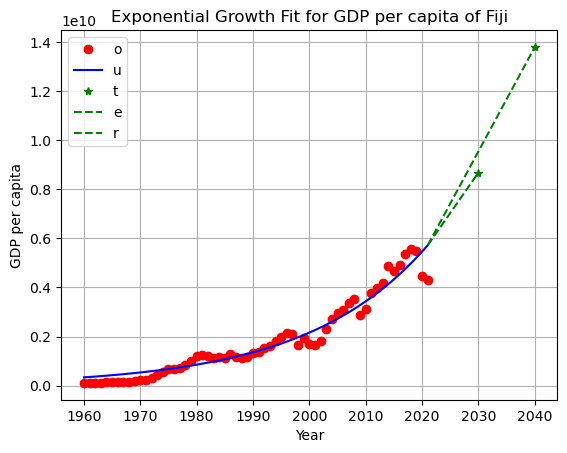

In [27]:
# Plot the data, fitted curve, and predictions
plt.plot(years, GDP, 'ro', label='Data')
plt.plot(curve_years, curve_GDP, 'b-', label='Fitted Curve')
plt.plot(prediction_years, predictions, 'g*', label='Predictions')
plt.plot([curve_years[-1], prediction_years[0]], [curve_GDP[-1], predictions[0]], 'g--')
plt.plot([curve_years[-1], prediction_years[1]], [curve_GDP[-1], predictions[1]], 'g--')
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.title('Exponential Growth Fit for GDP per capita of Fiji')
plt.legend('outer')
plt.grid(True)
plt.show()

In [28]:
#fitting for United States using Polynomial function


def polynomial(t, *coefficients):
    """Computes a polynomial function
    
    Parameters:
        t: The current time
        coefficients: Coefficients of the polynomial function
        
    Returns:
        The value at the given time
    """
    return np.polyval(coefficients, t)

In [29]:
# Obtain the years and GDP data
years = df_capita_years['Year'].values
GDP = df_capita_years['United States'].values

In [30]:
# Define the degree of the polynomial
degree = 3

In [31]:
# Perform polynomial curve fitting
coefficients = np.polyfit(years, GDP, degree)

In [32]:
# Generate points for the fitted curve
curve_years = np.linspace(min(years), max(years), 100)
curve_GDP = polynomial(curve_years, *coefficients)

In [33]:
# Predictions for 2030 and 2040
prediction_years = np.array([2030, 2040])
predictions = polynomial(prediction_years, *coefficients)
print("GDP per capita prediction for 2030:", predictions[0])
print("GDP per capita prediction for 2040:", predictions[1])

GDP per capita prediction for 2030: 28993286376848.0
GDP per capita prediction for 2040: 37162876587744.0


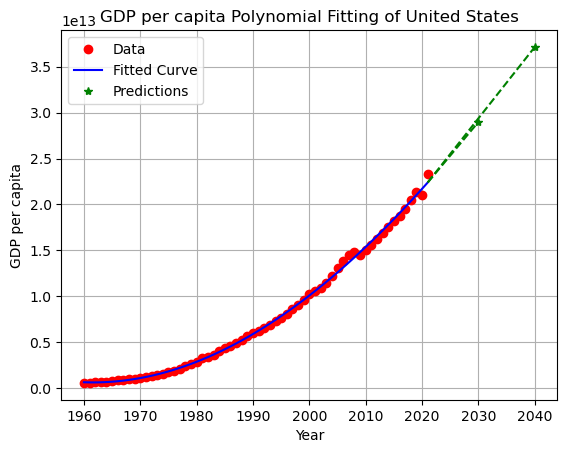

In [34]:
# Plot the data, fitted curve, and predictions
plt.plot(years, GDP, 'ro', label='Data')
plt.plot(curve_years, curve_GDP, 'b-', label='Fitted Curve')
plt.plot(prediction_years, predictions, 'g*', label='Predictions')
plt.plot([curve_years[-1], prediction_years[0]], [curve_GDP[-1], predictions[0]], 'g--')
plt.plot([curve_years[-1], prediction_years[1]], [curve_GDP[-1], predictions[1]], 'g--')
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.title('GDP per capita Polynomial Fitting of United States')
plt.legend()
plt.grid(True)
plt.show()


In [35]:
#fitting for Colombia using Polynomial function


def polynomial(t, *coefficients):
    """Computes a polynomial function
    
    Parameters:
        t: The current time
        coefficients: Coefficients of the polynomial function
        
    Returns:
        The value at the given time
    """
    return np.polyval(coefficients, t)

In [36]:
# Obtain the years and GDP data
years = df_capita_years['Year'].values
GDP = df_capita_years['Colombia'].values

In [37]:
# Define the degree of the polynomial
degree = 3

In [38]:
# Perform polynomial curve fitting
coefficients = np.polyfit(years, GDP, degree)

In [39]:
# Generate points for the fitted curve
curve_years = np.linspace(min(years), max(years), 100)
curve_GDP = polynomial(curve_years, *coefficients)

In [40]:
# Predictions for 2030 and 2040
prediction_years = np.array([2030, 2040])
predictions = polynomial(prediction_years, *coefficients)
print("GDP per capita prediction for 2030:", predictions[0])
print("GDP per capita prediction for 2040:", predictions[1])

GDP per capita prediction for 2030: 517546238154.75
GDP per capita prediction for 2040: 699151063571.0


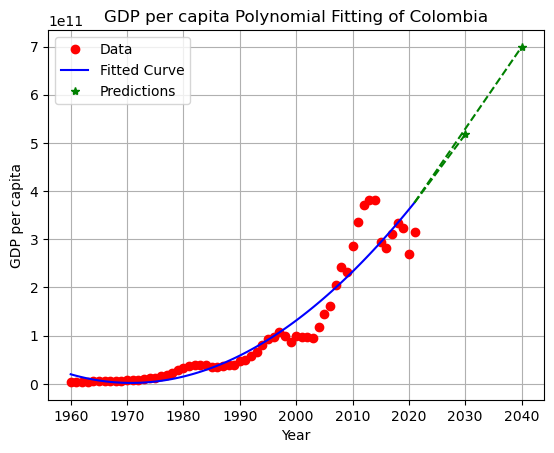

In [41]:
# Plot the data, fitted curve, and predictions
plt.plot(years, GDP, 'ro', label='Data')
plt.plot(curve_years, curve_GDP, 'b-', label='Fitted Curve')
plt.plot(prediction_years, predictions, 'g*', label='Predictions')
plt.plot([curve_years[-1], prediction_years[0]], [curve_GDP[-1], predictions[0]], 'g--')
plt.plot([curve_years[-1], prediction_years[1]], [curve_GDP[-1], predictions[1]], 'g--')
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.title('GDP per capita Polynomial Fitting of Colombia')
plt.legend()
plt.grid(True)
plt.show()